In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Users/felixbuchholz/repos/machine-learning/fb-assignment3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [5]:
X = data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh', 'po', 'li', 'ar']]

In [6]:
X.head()

,pl,si,va,te,co,or,sh,po,li,ar
0,2,2,3,0,0,4,3,0,0,5
1,4,3,1,3,0,3,2,0,0,5
2,3,0,2,4,4,2,4,0,0,5
3,4,3,1,2,0,2,4,0,0,5
4,1,0,1,4,1,0,4,0,0,5


# KMeans

In [7]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

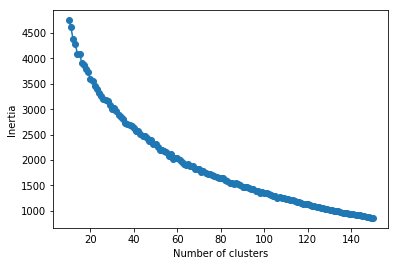

In [8]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(10, 151):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(10, 151), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [9]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [40, 50, 60]

For n_clusters = 40 The average silhouette_score is : 0.16695145255605998


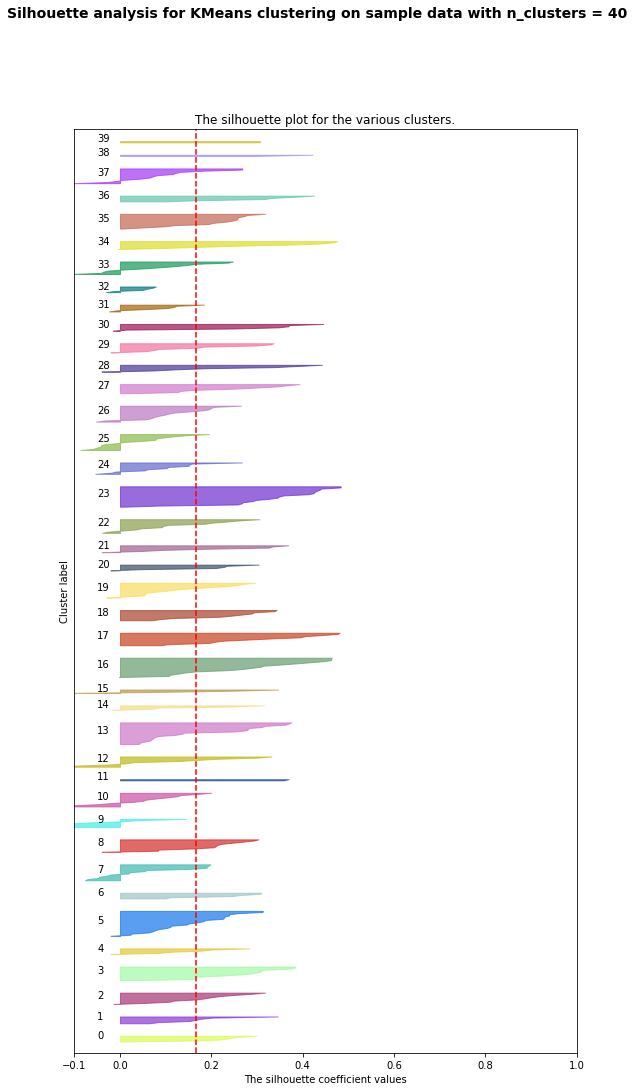

For n_clusters = 50 The average silhouette_score is : 0.1795177997043948


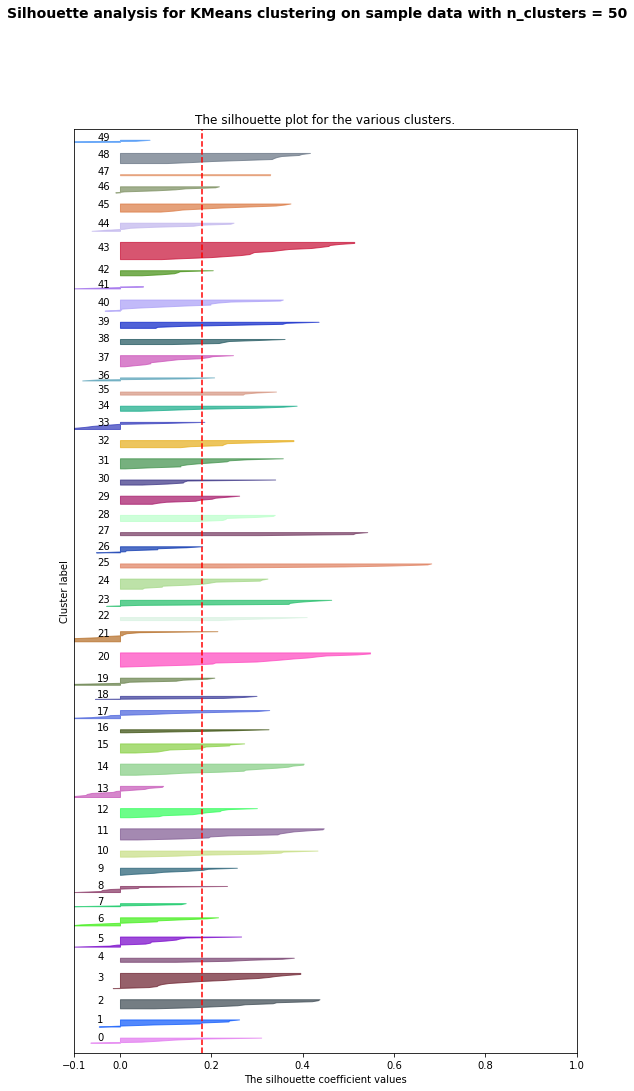

For n_clusters = 60 The average silhouette_score is : 0.17452996791974693


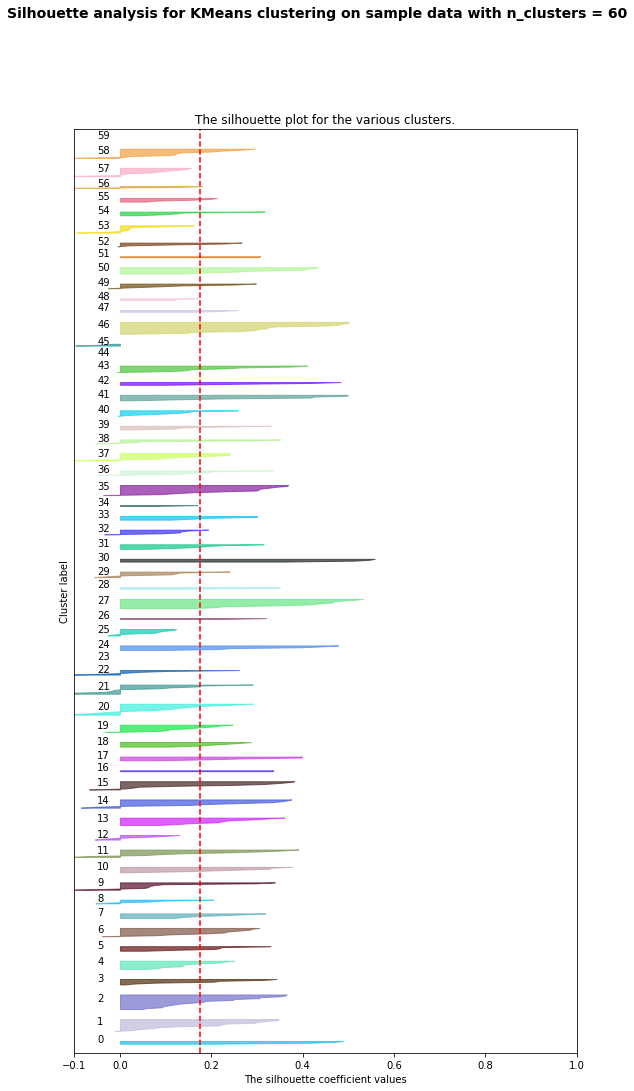

In [10]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [19]:
# set the number of clusters in the final model
my_n_clusters = 40 # I liked 30, 55 as well

In [20]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [45]:
raw_body_html = ""
toc = ""
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("<h2 id='" + str(i) + "'>Images in cluster: " + str(i) + "</h2>")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    toc += "<li><a href='#" + str(i) + "'>Cluster" + str(i) + "</a></li>"
    raw_body_html += "<h2 id='" + str(i) + "'><span class='back'><a href='#toc'>Back to the top</a></span><br>Images in cluster: " + str(i) + "</h2>"
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')
            raw_body_html += "<img src='img_small/" + str(j+2) + '_small.jpg' + "'>"

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<h2 id='0'>Images in cluster: 0</h2>
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
18_small.jpg
75_small.jpg
81_small.jpg
89_small.jpg
242_small.jpg
298_small.jpg
316_small.jpg
332_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<h2 id='1'>Images in cluster: 1</h2>
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
17_small.jpg
40_small.jpg
42_small.jpg
86_small.jpg
106_small.jpg
116_small.jpg
118_small.jpg
123_small.jpg
132_small.jpg
139_small.jpg
175_small.jpg
186_small.jpg
210_small.jpg
216_small.jpg
232_small.jpg
238_small.jpg
239_small.jpg
248_small.jpg
250_small.jpg
251_small.jpg
255_small.jpg
256_small.jpg
259_small.jpg
264_small.jpg
266_small.jpg
334_small.jpg
337_small.jpg
346_small.jpg
349_small.jpg
351_small.jpg
397_small.jpg
399_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<h2 id='2'>Images in cluster: 2</h2>
* * * * * * * * * * * * * 

In [46]:
print(raw_body_html)
import webbrowser

f = open('result.html','w')

html = "<html><head><link rel='stylesheet' type='text/css' href='style.css'></head><body><div id='toc'><ul>"+toc+"<ul></div><div id='clusters'>"+raw_body_html+"</div><script src='script.js'></script></body></html>"

f.write(html)
f.close()

#Change path to reflect file location
filename = '/Users/felixbuchholz/repos/machine-learning/fb-assignment3/' + 'result.html'
webbrowser.open_new_tab(filename)

# print(html)


<h2 id='0'><span class='back'><a href='#toc'>Back to the top</a></span><br>Images in cluster: 0</h2><img src='img_small/18_small.jpg'><img src='img_small/75_small.jpg'><img src='img_small/81_small.jpg'><img src='img_small/89_small.jpg'><img src='img_small/242_small.jpg'><img src='img_small/298_small.jpg'><img src='img_small/316_small.jpg'><img src='img_small/332_small.jpg'><h2 id='1'><span class='back'><a href='#toc'>Back to the top</a></span><br>Images in cluster: 1</h2><img src='img_small/17_small.jpg'><img src='img_small/40_small.jpg'><img src='img_small/42_small.jpg'><img src='img_small/86_small.jpg'><img src='img_small/106_small.jpg'><img src='img_small/116_small.jpg'><img src='img_small/118_small.jpg'><img src='img_small/123_small.jpg'><img src='img_small/132_small.jpg'><img src='img_small/139_small.jpg'><img src='img_small/175_small.jpg'><img src='img_small/186_small.jpg'><img src='img_small/210_small.jpg'><img src='img_small/216_small.jpg'><img src='img_small/232_small.jpg'><im

True